In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
upload=files.upload()

Saving iris.csv to iris.csv


In [3]:
data=pd.read_csv('iris.csv')
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.rename(columns={'Sepal.Length':'Sepal_Length'},inplace=True)

In [5]:
data.rename(columns={'Sepal.Width':'Sepal_Width'},inplace=True)
data.rename(columns={'Petal.Length':'Petal_Length'},inplace=True)
data.rename(columns={'Petal.Width':'Petal_Width'},inplace=True)

In [6]:
data.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

**There is no null values in the given dataa**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe().style.background_gradient('Accent_r')

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


**-->Sepal Length is moderately correlated with petal_length,petal_width and species.**

**-->sepal_width is less correlated with all the attributes.So that we can say that sepal width values are not much affect the species**

**-->petal length is highly correalted with all the attributes except sepal_width**

**-->petal_width is higly correlated with all the attributes except sepal_width**

**-->species are highly correlated with the petal_length,petal_width,species and moderately correlated with the sepal_length and less corelated with the sepal_width.**

<Axes: >

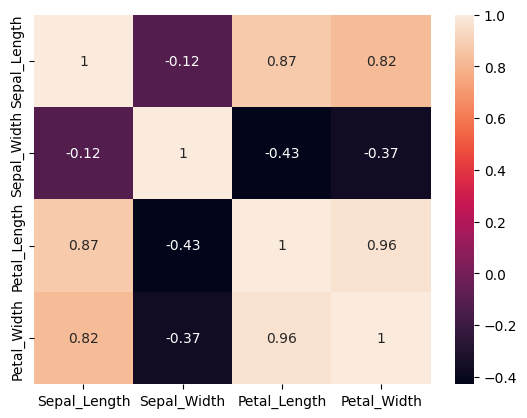

In [10]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Species', ylabel='count'>

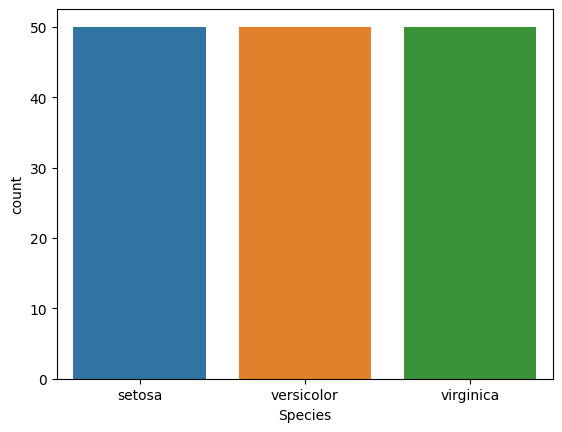

In [11]:
sns.countplot(x=data['Species'])

In [12]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


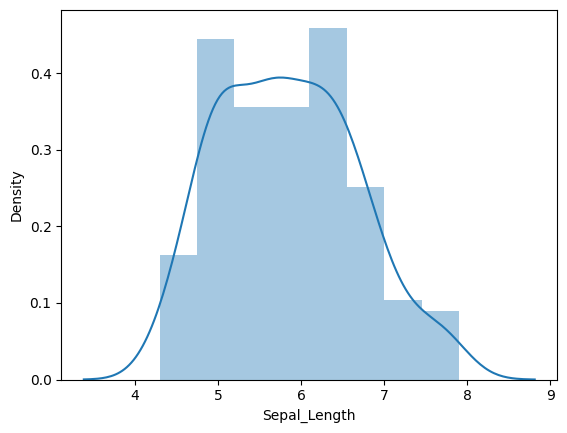

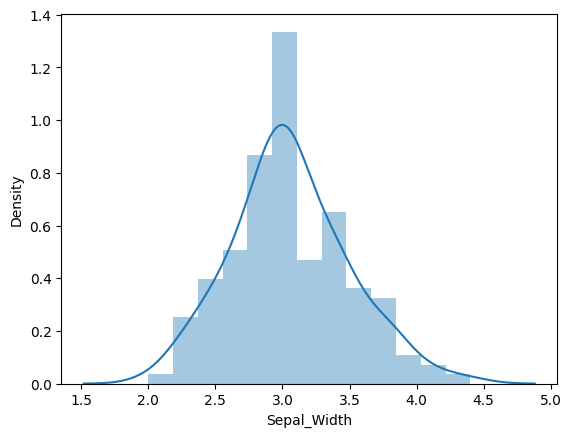

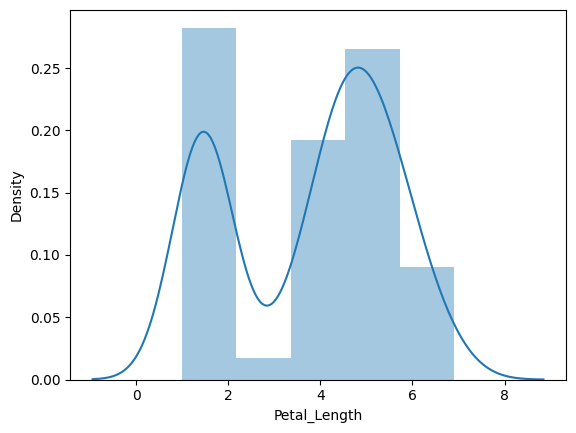

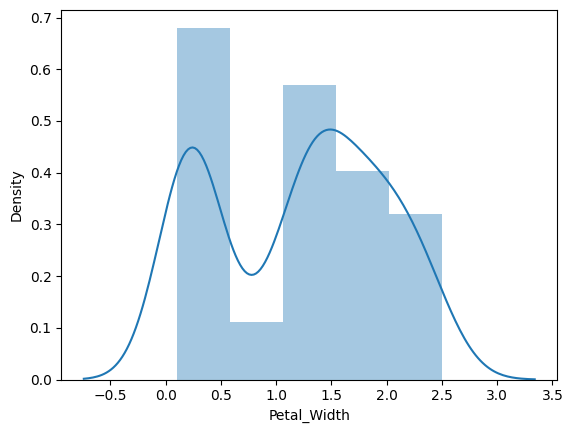

In [13]:
columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#plt.subplots(figsize=(15,10))
for i in columns:
  sns.distplot(data[i],label=True)
  plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])

In [15]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
plt.figure(figsize=(15,5))
px.pie(data,values='Sepal_Length',names='Species')

<Figure size 1500x500 with 0 Axes>

In [17]:
columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
plt.figure(figsize=(5,5))
for i in columns:
  fig=px.strip(data,x='Species',y=i,color='Species')
  fig.show()

<Figure size 500x500 with 0 Axes>

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**model training**

In [21]:
y_pred_train=model.predict(x_train )
y_pred=model.predict(x_test)

**Validating the model **

In [22]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test,y_pred)
accuracy_train=accuracy_score(y_train,y_pred_train)

In [23]:
print('Accuracy of the train model :',accuracy_test)
print('Accuracy of the test model :',accuracy_test )

Accuracy of the train model : 1.0
Accuracy of the test model : 1.0


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



** Checking the Model **

In [25]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
84,1,1
122,2,2
28,0,0
24,0,0
75,1,1
109,2,2
81,1,1
98,1,1
80,1,1
100,2,2
